In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.gridspec as gridspec

In [2]:
def preprocess_data(x, channel):
    y = pd.read_excel(x)
    i = 0
    for i in range(len(y.index)):
        y.rename(index={i: channel[i]}, inplace=True)
        i+=1
    y = y.T
    y = y[1:]
    return y

In [3]:
def normalize_data(x):
    i = x.shape[1]
    i = i-1
    y = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
    y = y[:,:i]
    return y

In [4]:
def x_to_array(x):
    y = x.values
    return y

In [5]:
def addclass(x, name):
    x['Class'] = pd.Series(name, index=x.index)
    return x

In [6]:
def mergedf3(x1, x2, x3):
    y = pd.concat([x1, x2, x3])
    return y

In [7]:
def mergedf4(x1, x2, x3, x4):
    y = pd.concat([x1, x2, x3, x4])
    return y

In [8]:
def mergedf5(x1, x2, x3, x4, x5):
    y = pd.concat([x1, x2, x3, x4, x5])
    return y

In [9]:
classes = ['60Co', '22Na', '241Am', 'Mix', '90Sr']

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label Sebenarnya')
    plt.xlabel('Label Prediksi')

In [11]:
kal = pd.read_excel('Co_1.xlsx')
#kal = kal.values
kal = kal.iloc[::,0]
kal = kal.astype(str)

In [12]:
co1 = preprocess_data('Co_1.xlsx', kal)
co2 = preprocess_data('Co_2.xlsx', kal)
co3 = preprocess_data('Co_3.xlsx', kal)
na1 = preprocess_data('Na_1.xlsx', kal)
na2 = preprocess_data('Na_2.xlsx', kal)
na3 = preprocess_data('Na_3.xlsx', kal)
am1 = preprocess_data('Am_1.xlsx', kal)
am2 = preprocess_data('Am_2.xlsx', kal)
am3 = preprocess_data('Am_3.xlsx', kal)
mix1 = preprocess_data('Mix_1.xlsx', kal)
mix2 = preprocess_data('Mix_2.xlsx', kal)
mix3 = preprocess_data('Mix_3.xlsx', kal)
sr1 = preprocess_data('Sr_1.xlsx', kal)
sr2 = preprocess_data('Sr_2.xlsx', kal)
sr3 = preprocess_data('Sr_3.xlsx', kal)

In [13]:
co = mergedf3(co1, co2, co3)
na = mergedf3(na1, na2, na3)
am = mergedf3(am1, am2, am3)
mix = mergedf3(mix1, mix2, mix3)
sr = mergedf3(sr1, sr2, sr3)

In [14]:
co = addclass(co, 0)
na = addclass(na, 1)
am = addclass(am, 2)
mix = addclass(mix, 3)
sr = addclass(sr, 4)

In [15]:
all_data = mergedf5(co, na, am, mix, sr)
all_data.shape

(1000, 257)

In [16]:
co_q = co.sample(frac=0.25)
na_q = na.sample(frac=0.25)
am_q = am.sample(frac=0.25)
mix_q = mix.sample(frac=0.25)
sr_q = sr.sample(frac=0.25)
quart = mergedf5(co_q, na_q, am_q, mix_q, sr_q)
quart.shape

(250, 257)

In [17]:
co_h = co.sample(frac=0.5)
na_h = na.sample(frac=0.5)
am_h = am.sample(frac=0.5)
mix_h = mix.sample(frac=0.5)
sr_h = sr.sample(frac=0.5)
half = mergedf5(co_h, na_h, am_h, mix_h, sr_h)
half.shape

(500, 257)

In [18]:
#Memuat dataset test

Co_45 = preprocess_data('Co_Tes_45.xlsx', kal)
Co_90 = preprocess_data('Co_Tes_90.xlsx', kal)
Co_150 = preprocess_data('Co_Tes_150.xlsx', kal)
Co_240 = preprocess_data('Co_Tes_240.xlsx', kal)

Na_45 = preprocess_data('Na_Tes_45.xlsx', kal)
Na_90 = preprocess_data('Na_Tes_90.xlsx', kal)
Na_150 = preprocess_data('Na_Tes_150.xlsx', kal)
Na_240 = preprocess_data('Na_Tes_240.xlsx', kal)

Am_45 = preprocess_data('Am_Tes_45.xlsx', kal)
Am_90 = preprocess_data('Am_Tes_90.xlsx', kal)
Am_150 = preprocess_data('Am_Tes_150.xlsx', kal)
Am_240 = preprocess_data('Am_Tes_240.xlsx', kal)

Mix_45 = preprocess_data('Mix_Tes_45.xlsx', kal)
Mix_90 = preprocess_data('Mix_Tes_90.xlsx', kal)
Mix_150 = preprocess_data('Mix_Tes_150.xlsx', kal)
Mix_240 = preprocess_data('Mix_Tes_240.xlsx', kal)

Sr_45 = preprocess_data('Sr_Tes_45.xlsx', kal)
Sr_90 = preprocess_data('Sr_Tes_90.xlsx', kal)
Sr_150 = preprocess_data('Sr_Tes_150.xlsx', kal)
Sr_240 = preprocess_data('Sr_Tes_240.xlsx', kal)

print(Co_45.shape)
print(Co_90.shape)
print(Co_150.shape)
print(Co_240.shape)

(5, 256)
(5, 256)
(5, 256)
(5, 256)


In [19]:
Co_Tes = mergedf4(Co_45, Co_90, Co_150, Co_240)
Na_Tes = mergedf4(Na_45, Na_90, Na_150, Na_240)
Am_Tes = mergedf4(Am_45, Am_90, Am_150, Am_240)
Mix_Tes = mergedf4(Mix_45, Mix_90, Mix_150, Mix_240)
Sr_Tes = mergedf4(Sr_45, Sr_90, Sr_150, Sr_240)

In [20]:
Co_Tes = addclass(Co_Tes, 0)
Na_Tes = addclass(Na_Tes, 1)
Am_Tes = addclass(Am_Tes, 2)
Mix_Tes = addclass(Mix_Tes, 3)
Sr_Tes = addclass(Sr_Tes, 4)

In [21]:
Co_tes_q = Co_Tes.sample(frac=0.25)
Na_tes_q = Na_Tes.sample(frac=0.25)
Am_tes_q = Am_Tes.sample(frac=0.25)
Mix_tes_q = Mix_Tes.sample(frac=0.25)
Sr_tes_q = Sr_Tes.sample(frac=0.25)

In [22]:
Co_tes_h = Co_Tes.sample(frac=0.5)
Na_tes_h = Na_Tes.sample(frac=0.5)
Am_tes_h = Am_Tes.sample(frac=0.5)
Mix_tes_h = Mix_Tes.sample(frac=0.5)
Sr_tes_h = Sr_Tes.sample(frac=0.5)

In [23]:
Tes = mergedf5(Co_Tes, Na_Tes, Am_Tes, Mix_Tes, Sr_Tes)
Tes_q = mergedf5(Co_tes_q, Na_tes_q, Am_tes_q, Mix_tes_q, Sr_tes_q)
Tes_h = mergedf5(Co_tes_h, Na_tes_h, Am_tes_h, Mix_tes_h, Sr_tes_h)
print(Tes_q.shape)
print(Tes_h.shape)
print(Tes.shape)

(25, 257)
(50, 257)
(100, 257)


In [24]:
#Mengubah data training menjadi array dan normalisasi data training

X_q = x_to_array(quart)
X_q = normalize_data(X_q)
X_h = x_to_array(half)
X_h = normalize_data(X_h)
X = x_to_array(all_data)
X = normalize_data(X)
print(X_q.shape)
print(X_h.shape)
print(X.shape)

(250, 256)
(500, 256)
(1000, 256)


In [25]:
#Mengambil data pada kolom 'Class' dataset training untuk dijadikan sebagai target

y_q = quart['Class']
y_q = x_to_array(y_q)
y_h = half['Class']
y_h = x_to_array(y_h)
y = all_data['Class']
y = x_to_array(y)
print(y_q.shape)
print(y_h.shape)
print(y.shape)

(250,)
(500,)
(1000,)


In [26]:
#Mengubah dataset test menjadi array dan normalisasi dataset training

X_q_test = x_to_array(Tes_q)
X_q_test = normalize_data(X_q_test)
X_h_test = x_to_array(Tes_h)
X_h_test = normalize_data(X_h_test)
X_test = x_to_array(Tes)
X_test = normalize_data(X_test)
print(X_q_test.shape)
print(X_h_test.shape)
print(X_test.shape)

(25, 256)
(50, 256)
(100, 256)


In [27]:
#Mengambil data pada kolom 'Class' dataset test untuk dijadikan target

y_q_test = Tes_q['Class']
y_q_test = x_to_array(y_q_test)
y_h_test = Tes_h['Class']
y_h_test = x_to_array(y_h_test)
y_test = Tes['Class']
y_test = x_to_array(y_test)
print(y_q_test.shape)
print(y_h_test.shape)
print(y_test.shape)

(25,)
(50,)
(100,)


# PLOTTING MINKOWSKI (K = 1, 2, ..., 9)

In [28]:
Ks = 10
mean_acc_mink_q = np.zeros((Ks-1))
mean_acc_mink_h = np.zeros((Ks-1))
mean_acc_mink = np.zeros((Ks-1))

test = [X_q_test, X_h_test, X_test]
label_test = [y_q_test, y_h_test, y_test]

mean_acc_mink_q = [[], [], []]
mean_acc_mink_h = [[], [], []]
mean_acc_mink = [[], [], []]

# mink_q_pred = []
# mink_h_pred = []
# mink_pred = []
# j = 0

ConfustionMx = [];

for i in range(0,3):
    
    for n in range(1,Ks):
    
        #Train Model and Predict  
        mink_q = KNeighborsClassifier(n_neighbors = n, p=3, metric='minkowski').fit(X_q,y_q)
        mink_h = KNeighborsClassifier(n_neighbors = n, p=3, metric='minkowski').fit(X_h,y_h)
        mink = KNeighborsClassifier(n_neighbors = n, p=3, metric='minkowski').fit(X,y)
    
        mink_q_pred = mink_q.predict(test[i])
        mink_h_pred=mink_h.predict(test[i])
        mink_pred=mink.predict(test[i])
        
        mean_acc_mink_q[i].append((metrics.accuracy_score(label_test[i], mink_q_pred))*100)
        mean_acc_mink_h[i].append((metrics.accuracy_score(label_test[i], mink_h_pred))*100) 
        mean_acc_mink[i].append((metrics.accuracy_score(label_test[i], mink_pred))*100) 
        
#         mean_acc_mink_q[i][n-1] = metrics.accuracy_score(label_test[i], mink_q_pred)
#         mean_acc_mink_h[i][n-1] = metrics.accuracy_score(label_test[i], mink_h_pred)
#         mean_acc_mink[i][n-1] = metrics.accuracy_score(label_test[i], mink_pred)
    
        
#         mean_acc_mink_q[n-1] = metrics.accuracy_score(y_test, mink_q_pred)
#         mean_acc_mink_h[n-1] = metrics.accuracy_score(y_test, mink_h_pred)
#         mean_acc_mink[n-1] = metrics.accuracy_score(y_test, mink_pred)
    
print(mean_acc_mink_q)
print(mean_acc_mink_h)
print(mean_acc_mink)

[[68.0, 68.0, 76.0, 68.0, 72.0, 72.0, 68.0, 68.0, 72.0], [80.0, 68.0, 72.0, 78.0, 76.0, 80.0, 80.0, 76.0, 76.0], [65.0, 63.0, 71.0, 71.0, 74.0, 74.0, 71.0, 72.0, 69.0]]
[[72.0, 76.0, 72.0, 80.0, 80.0, 72.0, 72.0, 72.0, 72.0], [78.0, 70.0, 68.0, 76.0, 78.0, 76.0, 82.0, 78.0, 78.0], [74.0, 75.0, 76.0, 75.0, 77.0, 78.0, 78.0, 78.0, 80.0]]
[[80.0, 72.0, 80.0, 80.0, 80.0, 80.0, 80.0, 76.0, 80.0], [74.0, 76.0, 74.0, 74.0, 74.0, 72.0, 72.0, 76.0, 72.0], [74.0, 71.0, 73.0, 79.0, 75.0, 79.0, 82.0, 79.0, 80.0]]


In [45]:
nilai_k = [i for i in range(1, 10)]

minkowski_q = {'Nilai k' : nilai_k,
               '250 - 25 tes' : mean_acc_mink_q[0],
               '250 - 50 tes' : mean_acc_mink_q[1],
               '250 - 100 tes' : mean_acc_mink_q[2]}

minkowski_h = {'500 - 25 tes' : mean_acc_mink_h[0],
               '500 - 50 tes' : mean_acc_mink_h[1],
               '500 - 100 tes' : mean_acc_mink_h[2]}

minkowski = {'1000 - 25 tes' : mean_acc_mink[0],
             '1000 - 50 tes' : mean_acc_mink[1],
             '1000 - 100 tes' : mean_acc_mink[2]}

df_min_q = pd.DataFrame((minkowski_q), columns=minkowski_q.keys())
df_min_h = pd.DataFrame((minkowski_h), columns=minkowski_h.keys())
df_mink = pd.DataFrame((minkowski), columns=minkowski.keys())

df_min = pd.concat([df_min_q, df_min_h, df_mink], axis=1)
df_min

,Nilai k,250 - 25 tes,250 - 50 tes,250 - 100 tes,500 - 25 tes,500 - 50 tes,500 - 100 tes,1000 - 25 tes,1000 - 50 tes,1000 - 100 tes
0,1,68.0,80.0,65.0,72.0,78.0,74.0,80.0,74.0,74.0
1,2,68.0,68.0,63.0,76.0,70.0,75.0,72.0,76.0,71.0
2,3,76.0,72.0,71.0,72.0,68.0,76.0,80.0,74.0,73.0
3,4,68.0,78.0,71.0,80.0,76.0,75.0,80.0,74.0,79.0
4,5,72.0,76.0,74.0,80.0,78.0,77.0,80.0,74.0,75.0
5,6,72.0,80.0,74.0,72.0,76.0,78.0,80.0,72.0,79.0
6,7,68.0,80.0,71.0,72.0,82.0,78.0,80.0,72.0,82.0
7,8,68.0,76.0,72.0,72.0,78.0,78.0,76.0,76.0,79.0
8,9,72.0,76.0,69.0,72.0,78.0,80.0,80.0,72.0,80.0


In [46]:
df_min.describe()

,Nilai k,250 - 25 tes,250 - 50 tes,250 - 100 tes,500 - 25 tes,500 - 50 tes,500 - 100 tes,1000 - 25 tes,1000 - 50 tes,1000 - 100 tes
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.000000,70.222222,76.222222,70.000000,74.222222,76.000000,76.777778,78.666667,73.777778,76.888889
std,2.738613,2.905933,4.055175,3.774917,3.527668,4.358899,1.922094,2.828427,1.563472,3.723051
min,1.000000,68.000000,68.000000,63.000000,72.000000,68.000000,74.000000,72.000000,72.000000,71.000000
25%,3.000000,68.000000,76.000000,69.000000,72.000000,76.000000,75.000000,80.000000,72.000000,74.000000
50%,5.000000,68.000000,76.000000,71.000000,72.000000,78.000000,77.000000,80.000000,74.000000,79.000000
75%,7.000000,72.000000,80.000000,72.000000,76.000000,78.000000,78.000000,80.000000,74.000000,79.000000
max,9.000000,76.000000,80.000000,74.000000,80.000000,82.000000,80.000000,80.000000,76.000000,82.000000


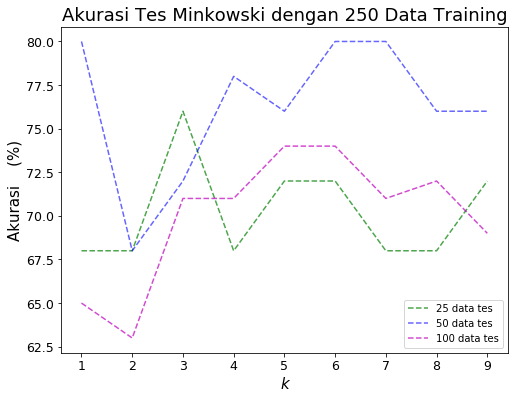

In [81]:
plt.figure(figsize=(8,6))

plt.title('Akurasi Tes Minkowski dengan 250 Data Training', size=18)
plt.ylabel('Akurasi    (%)', size = 15, color = 'k')
plt.xlabel('k', style='italic', size = 15, color = 'k')
plt.xticks(size=12.5)
plt.yticks(size=12.5)
plt.plot(df_min['Nilai k'], df_min['250 - 25 tes'], '--', color = 'g', alpha=0.7)
plt.plot(df_min['Nilai k'], df_min['250 - 50 tes'], '--', color = 'b', alpha=0.6)
plt.plot(df_min['Nilai k'], df_min['250 - 100 tes'], '--', color = 'm', alpha=0.7)
plt.legend(['25 data tes', '50 data tes', '100 data tes'], loc='lower right')

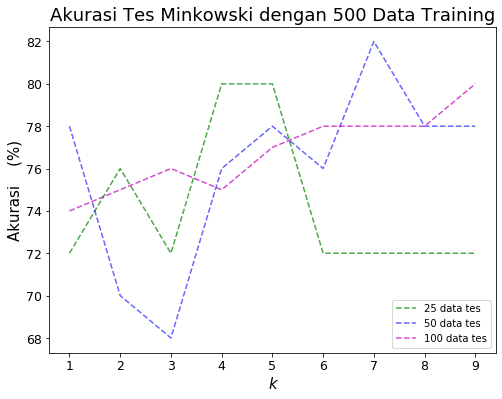

In [73]:
plt.figure(figsize=(8,6))

plt.title('Akurasi Tes Minkowski dengan 500 Data Training', size=18)
plt.ylabel('Akurasi    (%)', size = 15, color = 'k')
plt.xlabel('k', style='italic', size = 15, color = 'k')
plt.xticks(size=12.5)
plt.yticks(size=12.5)
plt.plot(df_min['Nilai k'], df_min['500 - 25 tes'], '--', color = 'g', alpha=0.7)
plt.plot(df_min['Nilai k'], df_min['500 - 50 tes'], '--', color = 'b', alpha=0.6)
plt.plot(df_min['Nilai k'], df_min['500 - 100 tes'], '--', color = 'm', alpha=0.7)
plt.legend(['25 data tes', '50 data tes', '100 data tes'], loc='lower right')

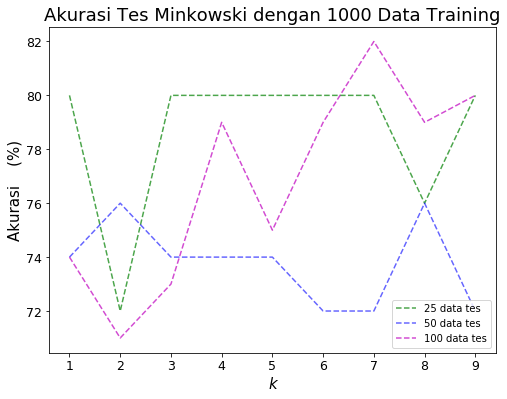

In [74]:
plt.figure(figsize=(8,6))

plt.title('Akurasi Tes Minkowski dengan 1000 Data Training', size=18)
plt.ylabel('Akurasi    (%)', size = 15, color = 'k')
plt.xlabel('k', style='italic', size = 15, color = 'k')
plt.xticks(size=12.5)
plt.yticks(size=12.5)
plt.plot(df_min['Nilai k'], df_min['1000 - 25 tes'], '--', color = 'g', alpha=0.7)
plt.plot(df_min['Nilai k'], df_min['1000 - 50 tes'], '--', color = 'b', alpha=0.6)
plt.plot(df_min['Nilai k'], df_min['1000 - 100 tes'], '--', color = 'm', alpha=0.7)
plt.legend(['25 data tes', '50 data tes', '100 data tes'], loc='lower right')

# PLOTTING MINKOWSKI (K = 1, 2, ..., 9)

In [33]:
Ks = 10
# mean_acc_euc_q = np.zeros((Ks-1))
# mean_acc_euc_h = np.zeros((Ks-1))
# mean_acc_euc = np.zeros((Ks-1))

test = [X_q_test, X_h_test, X_test]
label_test = [y_q_test, y_h_test, y_test]

mean_acc_euc_q = [[], [], []]
mean_acc_euc_h = [[], [], []]
mean_acc_euc = [[], [], []]

# mink_q_pred = []
# mink_h_pred = []
# mink_pred = []
# j = 0

ConfustionMx = [];

for i in range(0,3):
    
    for n in range(1,Ks):
    
        #Train Model and Predict  
        euc_q = KNeighborsClassifier(n_neighbors = n, p=2, metric='euclidean').fit(X_q,y_q)
        euc_h = KNeighborsClassifier(n_neighbors = n, p=2, metric='euclidean').fit(X_h,y_h)
        euc = KNeighborsClassifier(n_neighbors = n, p=2, metric='euclidean').fit(X,y)
    
        euc_q_pred = euc_q.predict(test[i])
        euc_h_pred=euc_h.predict(test[i])
        euc_pred=euc.predict(test[i])
        
        mean_acc_euc_q[i].append((metrics.accuracy_score(label_test[i], euc_q_pred))*100)
        mean_acc_euc_h[i].append((metrics.accuracy_score(label_test[i], euc_h_pred))*100) 
        mean_acc_euc[i].append((metrics.accuracy_score(label_test[i], euc_pred))*100) 
        
#         mean_acc_mink_q[i][n-1] = metrics.accuracy_score(label_test[i], mink_q_pred)
#         mean_acc_mink_h[i][n-1] = metrics.accuracy_score(label_test[i], mink_h_pred)
#         mean_acc_mink[i][n-1] = metrics.accuracy_score(label_test[i], mink_pred)
    
        
#         mean_acc_mink_q[n-1] = metrics.accuracy_score(y_test, mink_q_pred)
#         mean_acc_mink_h[n-1] = metrics.accuracy_score(y_test, mink_h_pred)
#         mean_acc_mink[n-1] = metrics.accuracy_score(y_test, mink_pred)
    
print(mean_acc_euc_q)
print(mean_acc_euc_h)
print(mean_acc_euc)

[[80.0, 84.0, 84.0, 84.0, 88.0, 80.0, 84.0, 84.0, 84.0], [84.0, 88.0, 86.0, 84.0, 86.0, 86.0, 86.0, 86.0, 86.0], [76.0, 78.0, 83.0, 80.0, 80.0, 80.0, 81.0, 81.0, 85.0]]
[[88.0, 88.0, 84.0, 88.0, 84.0, 84.0, 84.0, 88.0, 88.0], [90.0, 90.0, 92.0, 90.0, 90.0, 88.0, 88.0, 86.0, 88.0], [85.0, 85.0, 87.0, 91.0, 87.0, 88.0, 87.0, 85.0, 87.0]]
[[92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 88.0, 88.0], [90.0, 84.0, 92.0, 88.0, 92.0, 88.0, 86.0, 86.0, 86.0], [85.0, 84.0, 83.0, 85.0, 86.0, 86.0, 84.0, 86.0, 87.0]]


In [34]:
nilai_k = [i for i in range(1, 10)]

euclidean_q = {'Nilai k' : nilai_k,
               '250 - 25 tes' : mean_acc_euc_q[0],
               '250 - 50 tes' : mean_acc_euc_q[1],
               '250 - 100 tes' : mean_acc_euc_q[2]}

euclidean_h = {'500 - 25 tes' : mean_acc_euc_h[0],
               '500 - 50 tes' : mean_acc_euc_h[1],
               '500 - 100 tes' : mean_acc_euc_h[2]}

euclidean = {'1000 - 25 tes' : mean_acc_euc[0],
             '1000 - 50 tes' : mean_acc_euc[1],
             '1000 - 100 tes' : mean_acc_euc[2]}

df_euc_q = pd.DataFrame((euclidean_q), columns=euclidean_q.keys())
df_euc_h = pd.DataFrame((euclidean_h), columns=euclidean_h.keys())
df_euc = pd.DataFrame((euclidean), columns=euclidean.keys())

df_eucl = pd.concat([df_euc_q, df_euc_h, df_euc], axis=1)
df_eucl

,Nilai k,250 - 25 tes,250 - 50 tes,250 - 100 tes,500 - 25 tes,500 - 50 tes,500 - 100 tes,1000 - 25 tes,1000 - 50 tes,1000 - 100 tes
0,1,80.0,84.0,76.0,88.0,90.0,85.0,92.0,90.0,85.0
1,2,84.0,88.0,78.0,88.0,90.0,85.0,92.0,84.0,84.0
2,3,84.0,86.0,83.0,84.0,92.0,87.0,92.0,92.0,83.0
3,4,84.0,84.0,80.0,88.0,90.0,91.0,92.0,88.0,85.0
4,5,88.0,86.0,80.0,84.0,90.0,87.0,92.0,92.0,86.0
5,6,80.0,86.0,80.0,84.0,88.0,88.0,92.0,88.0,86.0
6,7,84.0,86.0,81.0,84.0,88.0,87.0,92.0,86.0,84.0
7,8,84.0,86.0,81.0,88.0,86.0,85.0,88.0,86.0,86.0
8,9,84.0,86.0,85.0,88.0,88.0,87.0,88.0,86.0,87.0


In [44]:
df_eucl.describe()

,Nilai k,250 - 25 tes,250 - 50 tes,250 - 100 tes,500 - 25 tes,500 - 50 tes,500 - 100 tes,1000 - 25 tes,1000 - 50 tes,1000 - 100 tes
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.000000,83.555556,85.777778,80.444444,86.222222,89.111111,86.888889,91.111111,88.000000,85.111111
std,2.738613,2.403701,1.201850,2.603417,2.108185,1.763834,1.900292,1.763834,2.828427,1.269296
min,1.000000,80.000000,84.000000,76.000000,84.000000,86.000000,85.000000,88.000000,84.000000,83.000000
25%,3.000000,84.000000,86.000000,80.000000,84.000000,88.000000,85.000000,92.000000,86.000000,84.000000
50%,5.000000,84.000000,86.000000,80.000000,88.000000,90.000000,87.000000,92.000000,88.000000,85.000000
75%,7.000000,84.000000,86.000000,81.000000,88.000000,90.000000,87.000000,92.000000,90.000000,86.000000
max,9.000000,88.000000,88.000000,85.000000,88.000000,92.000000,91.000000,92.000000,92.000000,87.000000


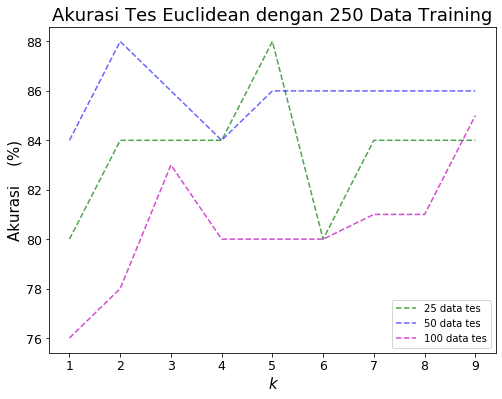

In [82]:
plt.figure(figsize=(8,6))

plt.title('Akurasi Tes Euclidean dengan 250 Data Training', size=18)
plt.ylabel('Akurasi    (%)', size = 15, color = 'k')
plt.xlabel('k', style='italic', size = 15, color = 'k')
plt.xticks(size=12.5)
plt.yticks(size=12.5)
plt.plot(df_eucl['Nilai k'], df_eucl['250 - 25 tes'], '--', color = 'g', alpha=0.7)
plt.plot(df_eucl['Nilai k'], df_eucl['250 - 50 tes'], '--', color = 'b', alpha=0.6)
plt.plot(df_eucl['Nilai k'], df_eucl['250 - 100 tes'], '--', color = 'm', alpha=0.7)
plt.legend(['25 data tes', '50 data tes', '100 data tes'], loc='lower right')

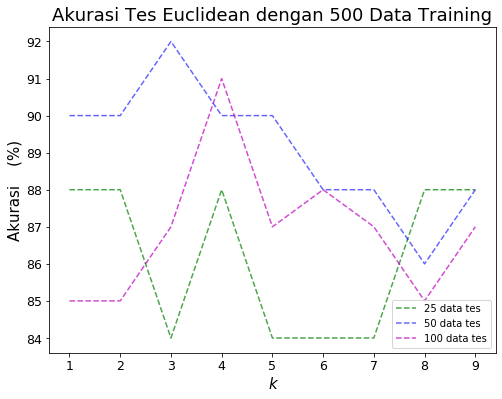

In [76]:
plt.figure(figsize=(8,6))

plt.title('Akurasi Tes Euclidean dengan 500 Data Training', size=18)
plt.ylabel('Akurasi    (%)', size = 15, color = 'k')
plt.xlabel('k', style='italic', size = 15, color = 'k')
plt.xticks(size=12.5)
plt.yticks(size=12.5)
# plt.tick_params(axis = 'y', size=13)
# plt.tick_params(axis = 'x', size=13)
plt.plot(df_eucl['Nilai k'], df_eucl['500 - 25 tes'], '--', color = 'g', alpha=0.7)
plt.plot(df_eucl['Nilai k'], df_eucl['500 - 50 tes'], '--', color = 'b', alpha=0.6)
plt.plot(df_eucl['Nilai k'], df_eucl['500 - 100 tes'], '--', color = 'm', alpha=0.7)
plt.legend(['25 data tes', '50 data tes', '100 data tes'], loc='lower right')

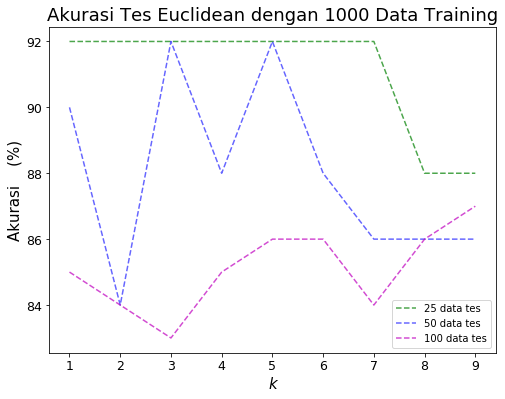

In [83]:
plt.figure(figsize=(8,6))

plt.title('Akurasi Tes Euclidean dengan 1000 Data Training', size=18)
plt.ylabel('Akurasi    (%)', size = 15, color = 'k')
plt.xlabel('k', style='italic', size = 15, color = 'k')
plt.xticks(size=12.5)
plt.yticks(size=12.5)
plt.plot(df_eucl['Nilai k'], df_eucl['1000 - 25 tes'], '--', color = 'g', alpha=0.7)
plt.plot(df_eucl['Nilai k'], df_eucl['1000 - 50 tes'], '--', color = 'b', alpha=0.6)
plt.plot(df_eucl['Nilai k'], df_eucl['1000 - 100 tes'], '--', color = 'm', alpha=0.7)
plt.legend(['25 data tes', '50 data tes', '100 data tes'], loc='lower right')

# PLOTTING METRIC MANHATTAN (K = 1, 2, ..., 9)

In [49]:
Ks = 10
# mean_acc_euc_q = np.zeros((Ks-1))
# mean_acc_euc_h = np.zeros((Ks-1))
# mean_acc_euc = np.zeros((Ks-1))

test = [X_q_test, X_h_test, X_test]
label_test = [y_q_test, y_h_test, y_test]

mean_acc_man_q = [[], [], []]
mean_acc_man_h = [[], [], []]
mean_acc_man = [[], [], []]

# mink_q_pred = []
# mink_h_pred = []
# mink_pred = []
# j = 0

ConfustionMx = [];

for i in range(0,3):
    
    for n in range(1,Ks):
    
        #Train Model and Predict  
        man_q = KNeighborsClassifier(n_neighbors = n, p=1, metric='manhattan').fit(X_q,y_q)
        man_h = KNeighborsClassifier(n_neighbors = n, p=1, metric='manhattan').fit(X_h,y_h)
        man = KNeighborsClassifier(n_neighbors = n, p=1, metric='manhattan').fit(X,y)
    
        man_q_pred = man_q.predict(test[i])
        man_h_pred=man_h.predict(test[i])
        man_pred=man.predict(test[i])
        
        mean_acc_man_q[i].append((metrics.accuracy_score(label_test[i], man_q_pred))*100)
        mean_acc_man_h[i].append((metrics.accuracy_score(label_test[i], man_h_pred))*100) 
        mean_acc_man[i].append((metrics.accuracy_score(label_test[i], man_pred))*100) 
        
#         mean_acc_mink_q[i][n-1] = metrics.accuracy_score(label_test[i], mink_q_pred)
#         mean_acc_mink_h[i][n-1] = metrics.accuracy_score(label_test[i], mink_h_pred)
#         mean_acc_mink[i][n-1] = metrics.accuracy_score(label_test[i], mink_pred)
    
        
#         mean_acc_mink_q[n-1] = metrics.accuracy_score(y_test, mink_q_pred)
#         mean_acc_mink_h[n-1] = metrics.accuracy_score(y_test, mink_h_pred)
#         mean_acc_mink[n-1] = metrics.accuracy_score(y_test, mink_pred)
    
print(mean_acc_man_q)
print(mean_acc_man_h)
print(mean_acc_man)

[[88.0, 92.0, 88.0, 88.0, 88.0, 84.0, 84.0, 84.0, 88.0], [94.0, 92.0, 94.0, 96.0, 94.0, 92.0, 94.0, 94.0, 96.0], [88.0, 85.0, 88.0, 88.0, 87.0, 88.0, 89.0, 88.0, 90.0]]
[[92.0, 92.0, 92.0, 92.0, 88.0, 92.0, 84.0, 88.0, 84.0], [94.0, 96.0, 92.0, 96.0, 96.0, 96.0, 96.0, 98.0, 94.0], [90.0, 92.0, 90.0, 92.0, 90.0, 94.0, 90.0, 91.0, 88.0]]
[[92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0], [96.0, 98.0, 96.0, 98.0, 96.0, 96.0, 96.0, 98.0, 96.0], [92.0, 92.0, 93.0, 93.0, 93.0, 93.0, 93.0, 93.0, 93.0]]


In [50]:
nilai_k = [i for i in range(1, 10)]

manhattan_q = {'Nilai k' : nilai_k,
               '250 - 25 tes' : mean_acc_man_q[0],
               '250 - 50 tes' : mean_acc_man_q[1],
               '250 - 100 tes' : mean_acc_man_q[2]}

manhattan_h = {'500 - 25 tes' : mean_acc_man_h[0],
               '500 - 50 tes' : mean_acc_man_h[1],
               '500 - 100 tes' : mean_acc_man_h[2]}

manhattan = {'1000 - 25 tes' : mean_acc_man[0],
             '1000 - 50 tes' : mean_acc_man[1],
             '1000 - 100 tes' : mean_acc_man[2]}

df_man_q = pd.DataFrame((manhattan_q), columns=manhattan_q.keys())
df_man_h = pd.DataFrame((manhattan_h), columns=manhattan_h.keys())
df_man = pd.DataFrame((manhattan), columns=manhattan.keys())

df_manh = pd.concat([df_man_q, df_man_h, df_man], axis=1)
df_manh

,Nilai k,250 - 25 tes,250 - 50 tes,250 - 100 tes,500 - 25 tes,500 - 50 tes,500 - 100 tes,1000 - 25 tes,1000 - 50 tes,1000 - 100 tes
0,1,88.0,94.0,88.0,92.0,94.0,90.0,92.0,96.0,92.0
1,2,92.0,92.0,85.0,92.0,96.0,92.0,92.0,98.0,92.0
2,3,88.0,94.0,88.0,92.0,92.0,90.0,92.0,96.0,93.0
3,4,88.0,96.0,88.0,92.0,96.0,92.0,92.0,98.0,93.0
4,5,88.0,94.0,87.0,88.0,96.0,90.0,92.0,96.0,93.0
5,6,84.0,92.0,88.0,92.0,96.0,94.0,92.0,96.0,93.0
6,7,84.0,94.0,89.0,84.0,96.0,90.0,92.0,96.0,93.0
7,8,84.0,94.0,88.0,88.0,98.0,91.0,92.0,98.0,93.0
8,9,88.0,96.0,90.0,84.0,94.0,88.0,92.0,96.0,93.0


In [ ]:
48/50

In [51]:
df_manh.describe()

,Nilai k,250 - 25 tes,250 - 50 tes,250 - 100 tes,500 - 25 tes,500 - 50 tes,500 - 100 tes,1000 - 25 tes,1000 - 50 tes,1000 - 100 tes
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000
mean,5.000000,87.111111,94.000000,87.888889,89.333333,95.333333,90.777778,92.0,96.666667,92.777778
std,2.738613,2.666667,1.414214,1.364225,3.464102,1.732051,1.715938,0.0,1.000000,0.440959
min,1.000000,84.000000,92.000000,85.000000,84.000000,92.000000,88.000000,92.0,96.000000,92.000000
25%,3.000000,84.000000,94.000000,88.000000,88.000000,94.000000,90.000000,92.0,96.000000,93.000000
50%,5.000000,88.000000,94.000000,88.000000,92.000000,96.000000,90.000000,92.0,96.000000,93.000000
75%,7.000000,88.000000,94.000000,88.000000,92.000000,96.000000,92.000000,92.0,98.000000,93.000000
max,9.000000,92.000000,96.000000,90.000000,92.000000,98.000000,94.000000,92.0,98.000000,93.000000


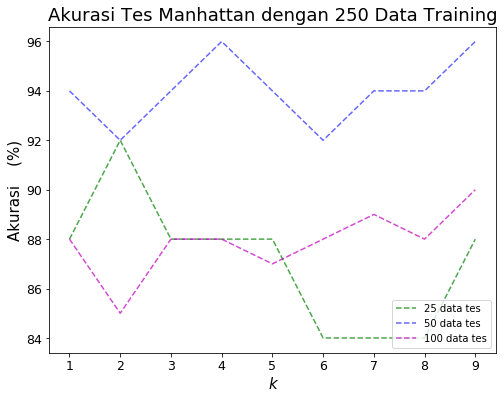

In [84]:
plt.figure(figsize=(8,6))

plt.title('Akurasi Tes Manhattan dengan 250 Data Training', size=18)
plt.ylabel('Akurasi    (%)', size = 15, color = 'k')
plt.xlabel('k', style='italic', size = 15, color = 'k')
plt.xticks(size=12.5)
plt.yticks(size=12.5)
plt.plot(df_manh['Nilai k'], df_manh['250 - 25 tes'], '--', color = 'g', alpha=0.7)
plt.plot(df_manh['Nilai k'], df_manh['250 - 50 tes'], '--', color = 'b', alpha=0.6)
plt.plot(df_manh['Nilai k'], df_manh['250 - 100 tes'], '--', color = 'm', alpha=0.7)
plt.legend(['25 data tes', '50 data tes', '100 data tes'], loc='lower right')

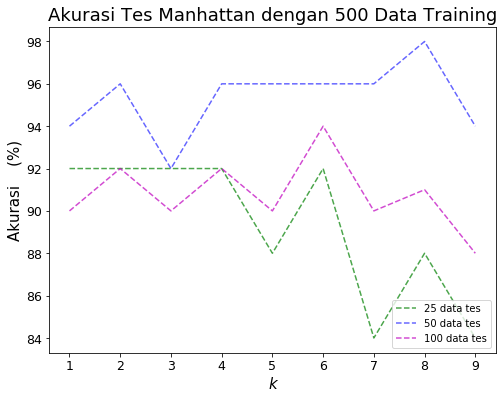

In [79]:
plt.figure(figsize=(8,6))

plt.title('Akurasi Tes Manhattan dengan 500 Data Training', size=18)
plt.ylabel('Akurasi    (%)', size = 15, color = 'k')
plt.xlabel('k', style='italic', size = 15, color = 'k')
plt.xticks(size=12.5)
plt.yticks(size=12.5)
plt.plot(df_manh['Nilai k'], df_manh['500 - 25 tes'], '--', color = 'g', alpha=0.7)
plt.plot(df_manh['Nilai k'], df_manh['500 - 50 tes'], '--', color = 'b', alpha=0.6)
plt.plot(df_manh['Nilai k'], df_manh['500 - 100 tes'], '--', color = 'm', alpha=0.7)
plt.legend(['25 data tes', '50 data tes', '100 data tes'], loc='lower right')

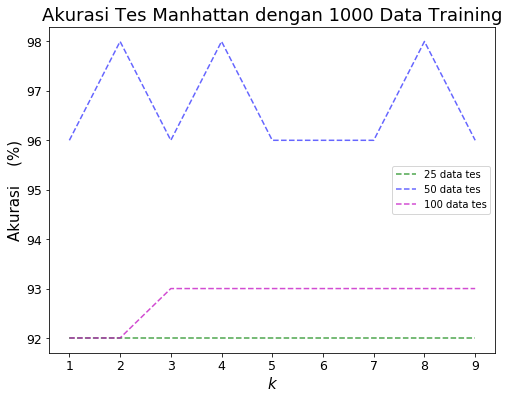

In [80]:
plt.figure(figsize=(8,6))

plt.title('Akurasi Tes Manhattan dengan 1000 Data Training', size=18)
plt.ylabel('Akurasi    (%)', size = 15, color = 'k')
plt.xlabel('k', style='italic', size = 15, color = 'k')
plt.xticks(size=12.5)
plt.yticks(size=12.5)
plt.plot(df_manh['Nilai k'], df_manh['1000 - 25 tes'], '--', color = 'g', alpha=0.7)
plt.plot(df_manh['Nilai k'], df_manh['1000 - 50 tes'], '--', color = 'b', alpha=0.6)
plt.plot(df_manh['Nilai k'], df_manh['1000 - 100 tes'], '--', color = 'm', alpha=0.7)
plt.legend(['25 data tes', '50 data tes', '100 data tes'], loc='lower right')